# import

In [1]:
import tensorflow as tf
from tensorflow import keras

# 데이터 로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# train, test 데이터 셋 분리

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


`-` 라벨 지정

In [6]:
labels =["T-shirt", "Trouser", "Pullover","Dress",
         "Coat", "Sandal", "Shirt", "Sneaker","Bag","Ankle boot"]

print(labels)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 시각화

In [7]:
import numpy as np
import matplotlib.pyplot as plt

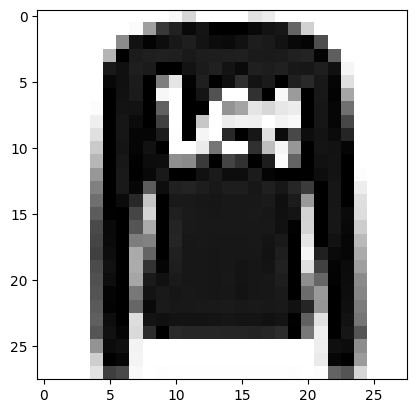

In [8]:
plt.imshow(x_test[1], cmap = "Greys")
plt.show()

# 데이터 전처리

`-` Min-Max scaling 금지 $\to$ 태블러 데이터에 최적화되어 있기 때문

* 전처리 규칙은 트레인셋을 따라야한다.

In [9]:
max_n, min_n = x_train.max(), x_train.min()
max_n, min_n

(255, 0)

In [10]:
train_x = (x_train - min_n) / (max_n - min_n)
test_x = (x_test - min_n) / (max_n - min_n)

`-` Date reshape(흑백채널 추가)

In [11]:
train_x_rel = train_x.reshape(-1,28,28,1)
test_x_rel = test_x.reshape(-1,28,28,1)

## one-hot encoding

In [12]:
from keras.utils import to_categorical

In [13]:
train_y_c = to_categorical(y_train, 10)
test_y_c = to_categorical(y_test, 10)

***

# 모델링 1. DNN

## import

In [14]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout

## 모델 설계

In [15]:
# 1. 세션 클리어
clear_session()

# 2. 모델 설계

model1 = Sequential()

model1.add( Input(shape = (28,28,1)))
model1.add( Flatten() )
model1.add( Dense(1024, activation = "relu"))
model1.add( Dense(1024, activation = "relu"))
model1.add( BatchNormalization())
model1.add( Dropout(0.25) )

model1.add( Dense(512, activation = "relu"))
model1.add( Dense(512, activation = "relu"))
model1.add( BatchNormalization())
model1.add( Dropout(0.25) )

model1.add( Dense (10, activation = "softmax"))

# 3. 모델 컴파일
model1.compile(optimizer = "adam", loss = tf.keras.losses.categorical_crossentropy,
               metrics = ["accuracy"])

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                        

## 학습

In [19]:
from keras.callbacks import EarlyStopping

In [20]:
es = EarlyStopping(monitor = "val_loss",
                  min_delta = 0,
                  patience = 3,
                   verbose = 1,
                   restore_best_weights = True)

In [22]:
history = model1.fit(train_x_rel, train_y_c,
                     epochs = 10000, verbose = 1,
                     validation_split = 0.2,
                     callbacks = [es]).history

Epoch 1/10000
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5921 - accuracy: 0.7939 - val_loss: 0.5014 - val_accuracy: 0.8234
Epoch 2/10000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4375 - accuracy: 0.8434 - val_loss: 0.5076 - val_accuracy: 0.8056
Epoch 3/10000
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3908 - accuracy: 0.8593 - val_loss: 0.4336 - val_accuracy: 0.8573
Epoch 4/10000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3534 - accuracy: 0.8709 - val_loss: 0.3595 - val_accuracy: 0.8655
Epoch 5/10000
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3349 - accuracy: 0.8790 - val_loss: 0.3693 - val_accuracy: 0.8729
Epoch 6/10000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3183 - accuracy: 0.8831 - val_loss: 0.3335 - val_accuracy: 0.8810
Epoch 7/10000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3068 - accuracy: 0.8870 - val

## 결과 시각화

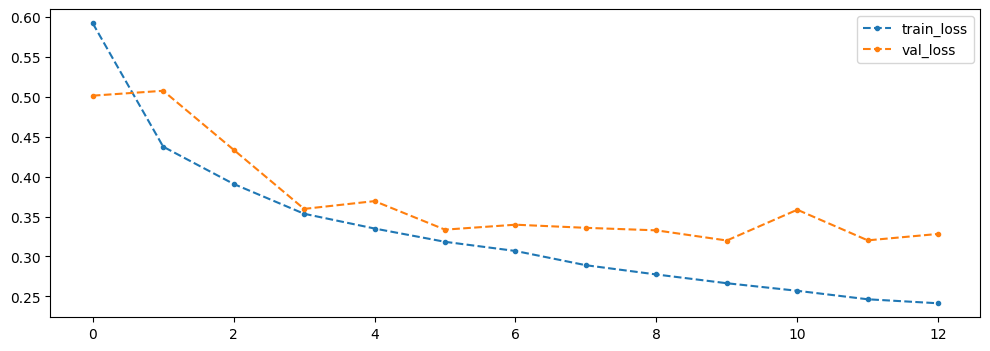

In [24]:
plt.figure(figsize = (12,4))
plt.plot(history["loss"],"--.",label = "train_loss")
plt.plot(history["val_loss"], "--.",label = "val_loss")
plt.legend()
plt.show()

## 예측

In [25]:
y_pred =  model1.predict(test_x_rel).argmax(axis = 1)

313/313 [==============================] - 1s 2ms/step


In [26]:
from sklearn.metrics import *

In [31]:
confusion_matrix(y_test, y_pred)

array([[875,   0,  18,  27,   1,   0,  70,   0,   9,   0],
       [  5, 958,   3,  30,   1,   0,   2,   0,   1,   0],
       [ 19,   0, 842,  15,  65,   0,  55,   0,   4,   0],
       [ 26,   2,   9, 920,  17,   0,  22,   0,   4,   0],
       [  1,   0, 146,  52, 721,   0,  73,   0,   7,   0],
       [  0,   0,   0,   0,   0, 987,   0,   9,   2,   2],
       [162,   0, 109,  31,  48,   0, 639,   0,  11,   0],
       [  0,   0,   0,   0,   0,  52,   0, 921,   0,  27],
       [  5,   0,  10,   2,   5,   4,   0,   4, 970,   0],
       [  0,   0,   0,   0,   0,  17,   1,  27,   0, 955]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.74      0.84      0.79      1000
           3       0.85      0.92      0.89      1000
           4       0.84      0.72      0.78      1000
           5       0.93      0.99      0.96      1000
           6       0.74      0.64      0.69      1000
           7       0.96      0.92      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



***

# 모델링 2. CNN

## import

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPool2D

## 모델 설계

In [62]:

# 1. 세션클리어
keras.backend.clear_session()

# 2. 모델 설계
model2 = Sequential()

model2.add(Input(shape = (28, 28, 1)))

model2.add( Conv2D(filters = 28, kernel_size = (3,3),
            strides = (1,1), padding = "same",
             activation = "relu"))

model2.add( Conv2D(filters = 28, kernel_size = (3,3),
            strides = (1,1), padding = "same",
             activation = "relu"))

model2.add( BatchNormalization() )
model2.add(MaxPool2D(pool_size = (2,2), strides= (2,2)))
model2.add ( keras.layers.Dropout(0.25) )

model2.add( keras.layers.Flatten() )
# Fully Connected Layer : 노드 1024개
model2.add( keras.layers.Dense(1024, activation = "relu"))

# BatchNormalization

model2.add(keras.layers.BatchNormalization())

# DropOut : 35% 비활성화

model2.add( keras.layers.Dropout(0.35) )

# 아웃풋레이어
model2.add( keras.layers.Dense(10, activation = "softmax"))

model2.compile(optimizer = "adam",
                              loss = keras.losses.categorical_crossentropy,
                              metrics = ["accuracy"])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 28)        112       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 flatten (Flatten)           (None, 5488)              0

## 모델 학습

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
train_x_rel.shape

(60000, 28, 28, 1)

In [65]:
es = EarlyStopping(
      monitor = "val_loss",
      min_delta = 0,
      patience = 3,
      verbose = 1,
      restore_best_weights  = True
)

In [66]:
history = model2.fit(train_x_rel, train_y_c,
                     epochs = 10000, verbose = 1,
                     validation_split = 0.2,
                     callbacks = [es]).history

Epoch 1/10000
1500/1500 [==============================] - 15s 7ms/step - loss: 0.4567 - accuracy: 0.8470 - val_loss: 0.2840 - val_accuracy: 0.9010
Epoch 2/10000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3097 - accuracy: 0.8893 - val_loss: 0.4721 - val_accuracy: 0.8445
Epoch 3/10000
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2647 - accuracy: 0.9051 - val_loss: 0.2349 - val_accuracy: 0.9137
Epoch 4/10000
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2322 - accuracy: 0.9162 - val_loss: 0.2548 - val_accuracy: 0.9100
Epoch 5/10000
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2109 - accuracy: 0.9235 - val_loss: 0.2960 - val_accuracy: 0.8965
Epoch 6/10000
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1826 - accuracy: 0.9339 - val_loss: 0.2662 - val_accuracy: 0.9133
Epoch 6: early stopping


## 결과 시각화

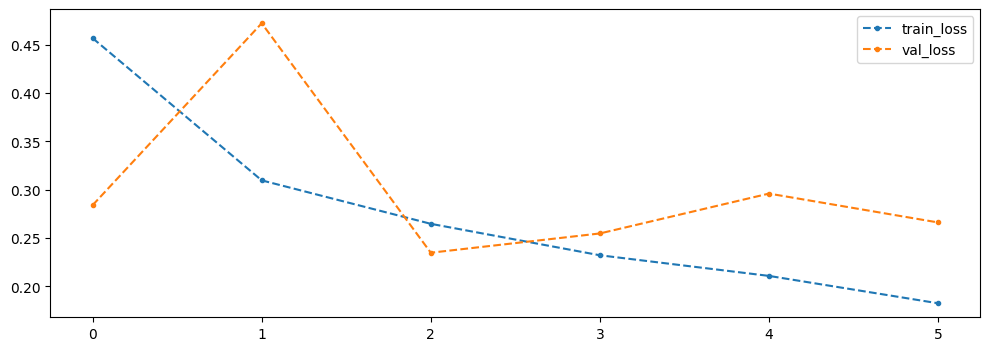

In [67]:
plt.figure(figsize = (12,4))
plt.plot(history["loss"],"--.",label = "train_loss")
plt.plot(history["val_loss"], "--.",label = "val_loss")
plt.legend()
plt.show()

## 예측

In [68]:
y_pred =  model1.predict(test_x_rel).argmax(axis = 1)

313/313 [==============================] - 1s 3ms/step


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.74      0.84      0.79      1000
           3       0.85      0.92      0.89      1000
           4       0.84      0.72      0.78      1000
           5       0.93      0.99      0.96      1000
           6       0.74      0.64      0.69      1000
           7       0.96      0.92      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

